In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

#  Polynomial curve fitting, regularization

1. Generate noise data sets (train and test) from $y(x) = 0.5 + 0.4\sin(2 \pi x)$, for $x$ in $[0,1]$.




In [2]:
def generate_noise_sets(n): #n is the number of points
    x = np.random.uniform(0,1,n)
    noise = np.random.normal(0,0.05,n)
    
    y = 0.5 + 0.4*np.sin(2*np.pi*x) + noise
    
    return (x,y)
    

In [3]:
#generate three train and test data sets with the number of points of 9, 15 and 100 respectively
np.random.seed(0)
tr_9 = generate_noise_sets(9)
tr_15 = generate_noise_sets(15)
tr_100 = generate_noise_sets(100)


te_9 = generate_noise_sets(9)
te_15 = generate_noise_sets(15)
te_100 = generate_noise_sets(100)

(array([0.82211773, 0.18984791, 0.51131898, 0.22431703, 0.09784448,
        0.86219152, 0.97291949, 0.96083466, 0.9065555 ]),
 array([0.10572881, 0.92866106, 0.46311841, 0.8566075 , 0.70580625,
        0.17719011, 0.4454652 , 0.37107513, 0.2547978 ]))

  2. Find the best polynomial approximation of degree $d$ ($d=0, d=1, ..., d = 9$) of the training sets and plot the results.

In [4]:
def poly_approximate(degree, train):
    x_s = np.linspace(0,1,100)
    poly_coef = []
    for d in degree:
        poly_coef.append(np.poly1d(np.polyfit(train[1],train[0], d)))
    
    
    
    for l in range(len(poly_coef)):
        plt.plot(x_s,poly_coef[l](x_s), label = 'degree' + str(degree[l]))
        plt.plot(train[0],train[1],'.',ms = 8)
        plt.xlabel("x")
        plt.ylabel("y")
        plt.legend()
        plt.show()
        
    
   
        

<ipython-input-5-0a65babfadd1>:3: RankWarning: Polyfit may be poorly conditioned
  poly_approximate(degree, tr_9)


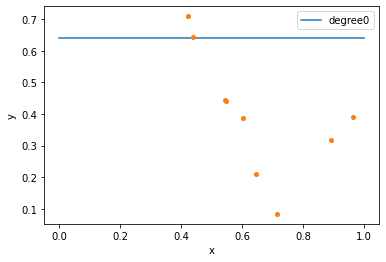

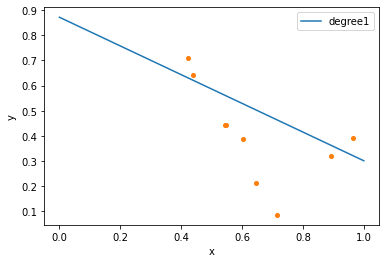

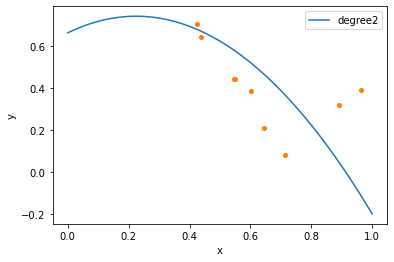

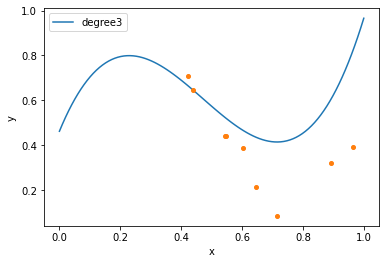

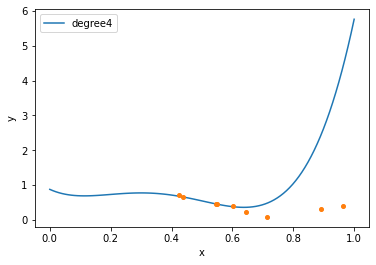

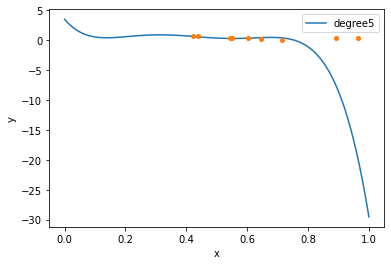

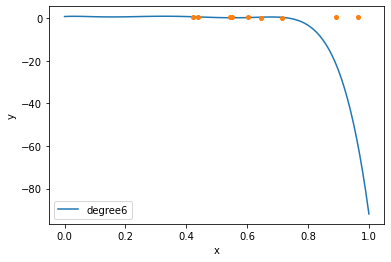

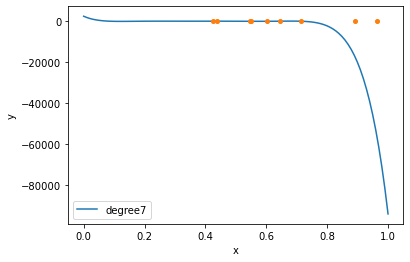

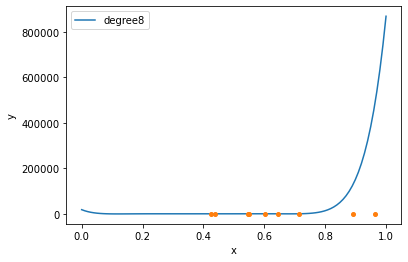

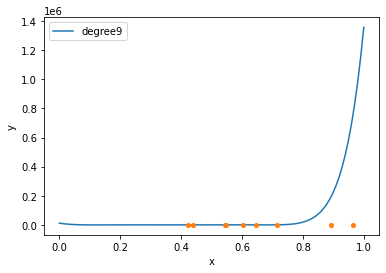

In [5]:
degree = [0,1,2,3,4,5,6,7,8,9]

poly_approximate(degree, tr_9)

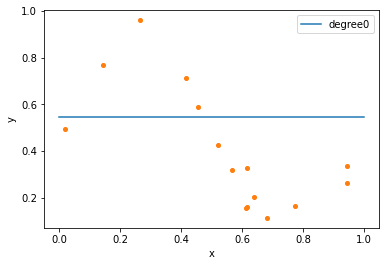

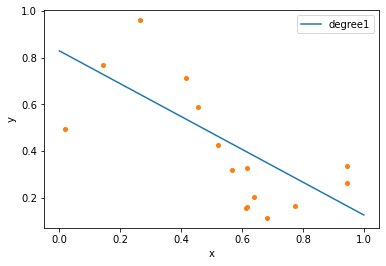

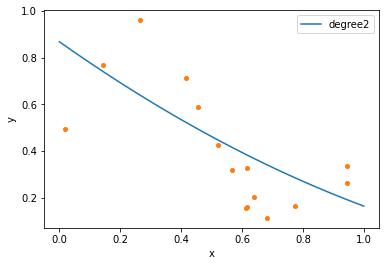

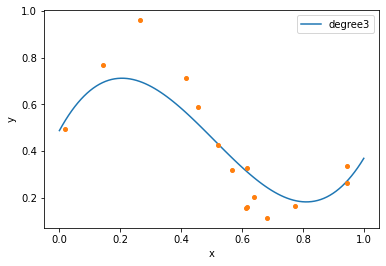

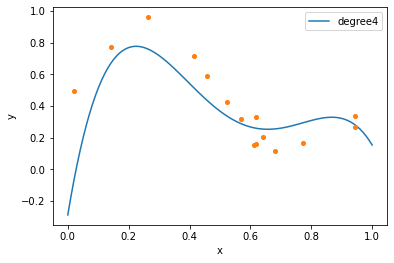

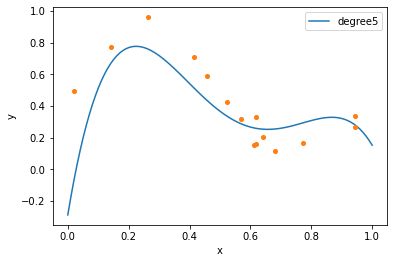

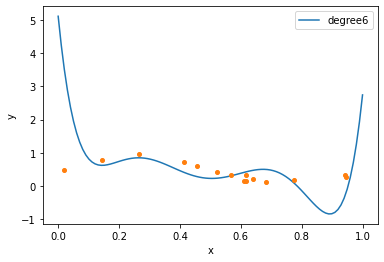

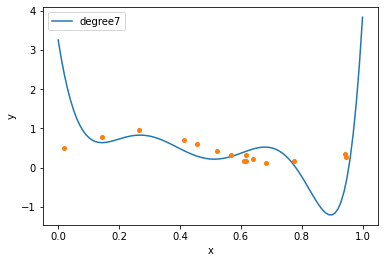

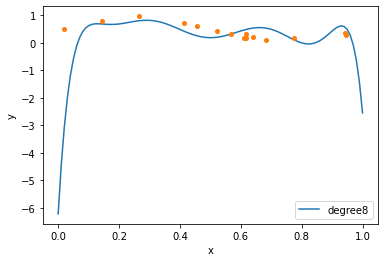

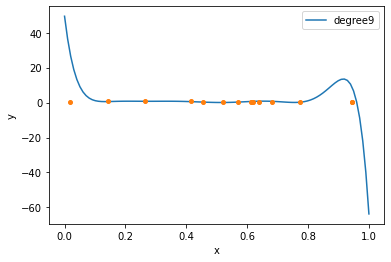

In [6]:
poly_approximate(degree,tr_15)

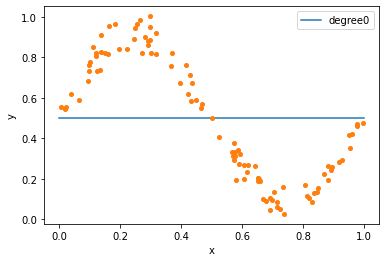

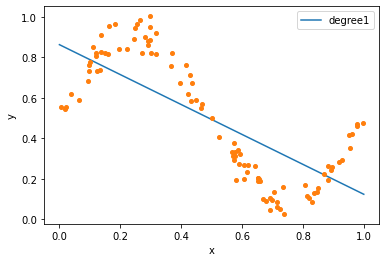

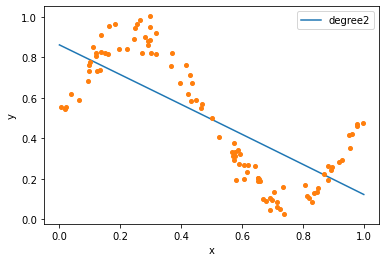

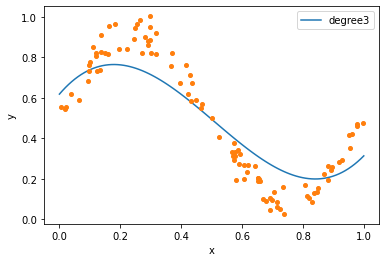

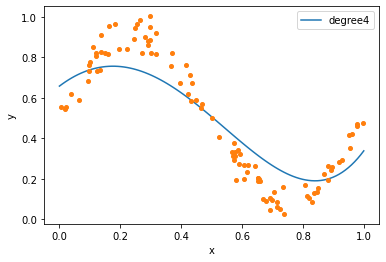

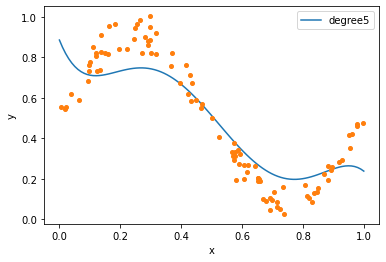

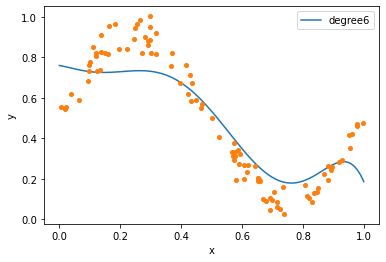

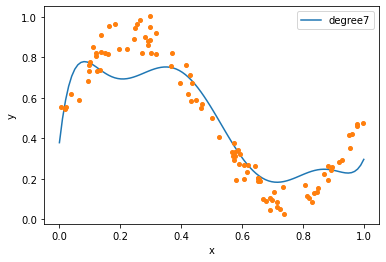

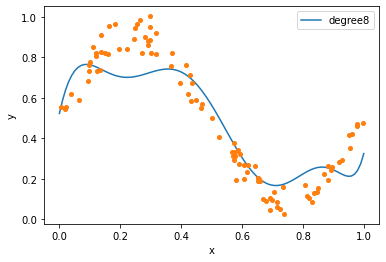

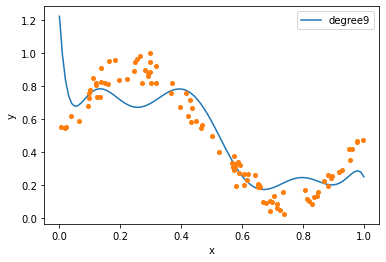

In [7]:
poly_approximate(degree,tr_100)

#From the three training data sets we can find that with relatively large data sets, higher degree polynomials have
# a better approximation to the trend of the line. But with too high polynomial degrees, there comes the problem of overfitting.


3. Generate 3 plots (one for each value of n) that demonstrate the approximation error (MSE) on the train and test sets as a function of the polynomial degree.

In [8]:
def MSE(degree, train, test):
    poly_coef = []
    mse = []
    
    for d in degree:
        poly_coef.append(np.poly1d(np.polyfit(train[1],train[0],d)))
        
    for l in range(len(poly_coef)):
        mse.append(np.mean((poly_coef[l](test[0]) - test[1])**2))
    
    #print(mse)
    plt.plot(degree, mse, 'o-c')
    plt.xlabel("degree")
    plt.ylabel("Mean squared error")
    plt.show
        

<ipython-input-9-c4c51cdc0dde>:1: RankWarning: Polyfit may be poorly conditioned
  MSE(degree, tr_9, te_9)


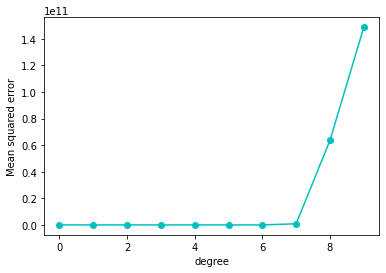

In [9]:
MSE(degree, tr_9, te_9)

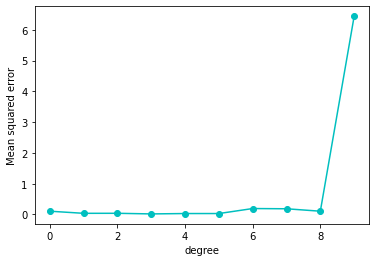

In [10]:
MSE(degree,tr_15,te_15)

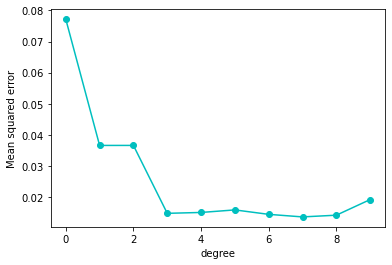

In [11]:
MSE(degree, tr_100, te_100)

From the three figures we can find out that the mean squared errors increase drastically when polynomial degree is bigger than 7. 
When the dataset is large enough, the mean squared errors decrease while the polynomial degree inceases. The mean squared error decrease drastically at degree 3 and keeps relatively stable until degree 8.

4. Ridge regression

In [12]:
from sklearn.linear_model import Ridge

In [13]:
def ridge_regression(alpha, train, test):
    from sklearn.linear_model import Ridge
    from sklearn.metrics import mean_squared_error
    
    #change data format into 2D
    train = np.array(train).reshape(np.array(train).shape[-1],np.array(train).shape[0])
    train = pd.DataFrame(train, columns = ("x","y"))
    
    test = np.array(test).reshape(np.array(test).shape[-1],np.array(test).shape[0])
    test = pd.DataFrame(test, columns = ("xtest","ytest"))
    
    #perform ridge regression
    rid = Ridge()
    
    score = []
    error = []
    
    for a in alpha:
        rid.set_params(alpha = a)
        rr = rid.fit(train[["x"]], train[["y"]])
        scr = rid.score(rr.predict(test[["xtest"]]), test[["ytest"]])
        score.append(scr)
        
        mse = mean_squared_error(rr.predict(test[["xtest"]]), test[["ytest"]])
        error.append(mse)
        
    plt.plot(alpha, error, ".")
    plt.xlabel("alpha")
    plt.ylabel("error")
    #print(error)
    #print(score)

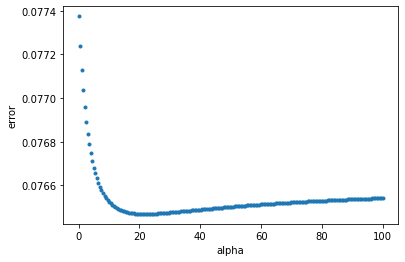

In [14]:
alp = np.linspace(0, 100, 200)

ridge_regression(alp, tr_100, te_100)


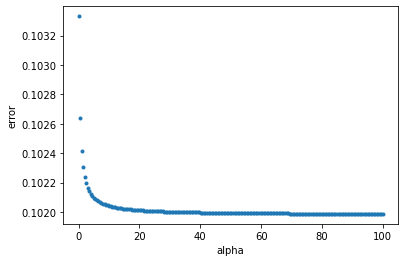

In [15]:
ridge_regression(alp, tr_9, te_9)


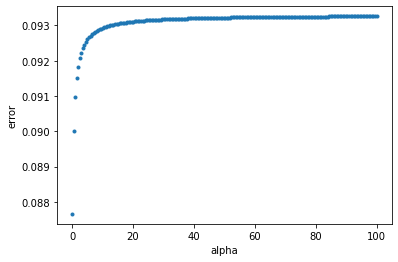

In [16]:
ridge_regression(alp, tr_15, te_15)


5. Now set d = 9. Play with different values for and plot the error on the train and test set as a function of for each value of n (3 figures).

In [36]:
def degree_nine_poly(train, test):
    
    poly_coef = np.poly1d(np.polyfit(train[1],train[0],9))
        
    squared_error = (poly_coef(test[0]) - test[1])**2
    
    #print(mse)
    plt.plot(test[0], squared_error, 'o')
    plt.xlabel("x")
    plt.ylabel("Squared error")
    plt.show

<ipython-input-37-9f6405073099>:1: RankWarning: Polyfit may be poorly conditioned
  degree_nine_poly(tr_9, te_9)


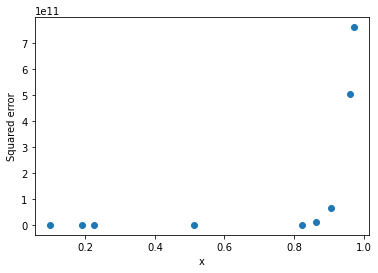

In [37]:
degree_nine_poly(tr_9, te_9)

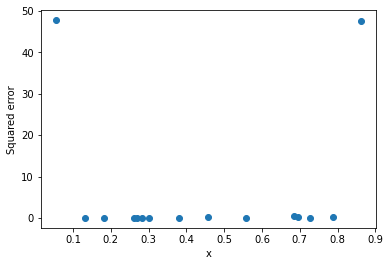

In [38]:
degree_nine_poly(tr_15, te_15)

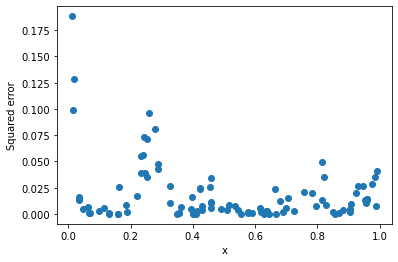

In [39]:
degree_nine_poly(tr_100, te_100)

When the polynomial degree at 9, The squared errors are more stable within a range when there are more data points in the data set.

# High dimensional spaces

1. Find the number of vertices (”corners”) of $U_{n}$, Corners(n)

When there are two dimensions, the number of corners of $U_{n}$ is $4$, which is $2^{2}$. When there are three dimensions, the number of corners is $8$, which is $2^{3}$. Since there in no corner at $0$ and $1$ dimension, thus the number of corners of $U_{n}$ is $2^{n}$ when $n \geq 2$.

2. Calculate the length of the longest diagonal of $U_{n}$, DiagU(n)



The longest diagonal of a unit square is $\sqrt{1^2 + 1^2}$ = $\sqrt{2}$, and the longest diagonal of a unit tube is $\sqrt{1^2 + \left(\sqrt{2}\right)^2}$, which can also be written as $\sqrt{1^2 + 1^2 + 1^2}$ in a three-dimensional space. Hence the longest diagonal of a unit cube in dimension n is $\sqrt{n\times 1^2}$. Following this pattern, the longest diagonal of a unit cube in $n = 100$ dimension is $\sqrt{100\times 1^2}$ = $10$.


3. What is the volume of Bn and how does it change as the number of dimensions increases? However you can approximate this procedure by generating random points, uniformly distributed within $U_n$ (points=rand$(10^6,n))$ and checking what percentage of them are contained within $B_n$.

In [17]:

def B_volumn(n, num_p): #n is the dimension, num_p is the number of points
    
    B = np.random.rand(num_p+1,n)
    count = 0
    
    
    for i in range(1,num_p+1):
        if np.sum((B[[i]] - 0.5)**2) < 0.5**2:
            count = count+1
    
    
    

    volumn = count/num_p
    return(count, volumn)
    
    
    


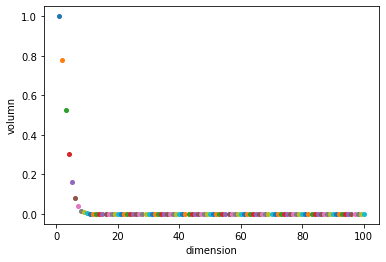

In [18]:
#B_volumn(2,100000)
for n in range(1,101):
    plt.plot(n,B_volumn(n,10**4)[1], "o", ms=4)
    plt.xlabel("dimension")
    plt.ylabel("volumn")
    plt.show

The plot shows that with dimension becoming higher and higher, the points are exceeding the edge of the ball, thus, the volumn of the ball becomes smaller and smaller and enventually approaching zero.

4. Calculate the volume of the ”0.01-skin” of Un : $VolumeS(n) = 1^n − (1 − 2 \times 0.01)^n$

In [19]:
def skin(n): #n is the number of dimensions
    volumn_skin = 1**n - (1 - 2*0.01)**n
    return(volumn_skin)

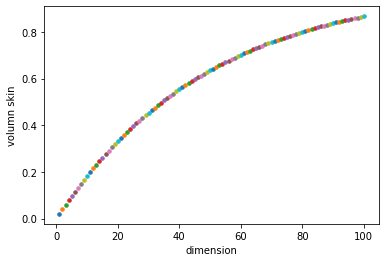

In [20]:
for n in range(1,101):
    plt.plot(n,skin(n), ".", ms = 7)
    plt.xlabel("dimension")
    plt.ylabel("volumn skin")
    plt.show
    
   

The plot of volumn skin against the different dimensions indicate that with dimensions become higher, the volumn skins keep increasing and enventually approach to 1, which is exactly the opposite to the volumn of the ball in higher dimensions. 

5. For n = 2, 4, 8, ...., 1024 generate 1000 points in $U_n$, uniformly distributed, find distances between all pairs of these points, and produce a histogram of these distances.

In [70]:

def distance(n): #n is the number of dimensions
    dist = []

    points = np.random.rand(1000,n)
    for i in range(0,1000-1):
        d = np.linalg.norm(points[[i]] - points[[i+1]])
        dist.append(d)
    
    plt.hist(dist, bins = 30, range = (0,15))
    plt.show
    
        
    

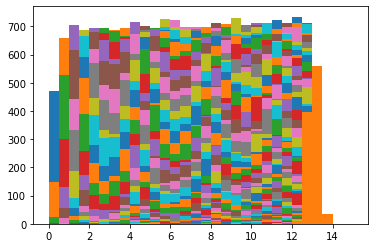

In [71]:
for l in range(2,1026,2):
    distance(l)




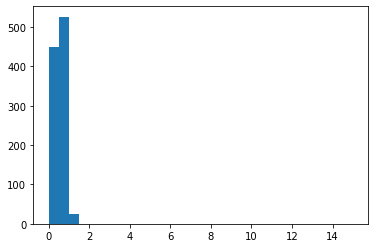

In [72]:
distance(2)

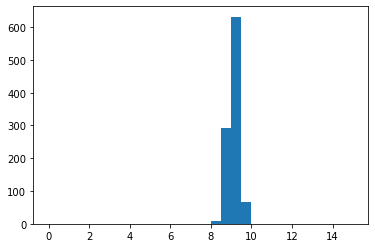

In [73]:
distance(500)

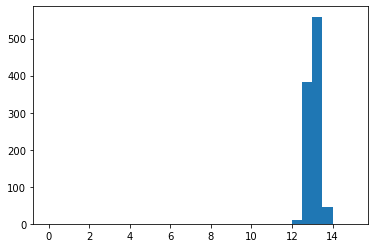

In [74]:
distance(1024)

The histogram of distances between pairs of points show that with dimension increasing, the distances are farther and farther apart from the center, which means the points are approaching the edge of the high-dimension space. In this case, the linear regression would not be a plausible method to predict the responses.